In [1]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


In [3]:
import wget
import requests 
import numpy as np
import pandas as pd

In [4]:
#Getting the dataset
srcsm_json = requests.get('https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json')

In [5]:
#Getting a quick view of the data
print(srcsm_json.text[0:450])

[
{"article_link": "https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5", "headline": "former versace store clerk sues over secret 'black code' for minority shoppers", "is_sarcastic": 0},
{"article_link": "https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365", "headline": "the 'roseanne' revival catches up to our thorny political mood, for better and worse", "is_sarcastic": 0},


In [6]:
sentences=[]
labels=[]

for item in srcsm_json.json():
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [7]:
print(sentences)
print(labels)

["former versace store clerk sues over secret 'black code' for minority shoppers", "the 'roseanne' revival catches up to our thorny political mood, for better and worse", "mom starting to fear son's web series closest thing she will have to grandchild", 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas', 'j.k. rowling wishes snape happy birthday in the most magical way', "advancing the world's women", 'the fascinating case for eating lab-grown meat', 'this ceo will send your kids to school, if you work for his company', 'top snake handler leaves sinking huckabee campaign', "friday's morning email: inside trump's presser for the ages", 'airline passengers tackle man who rushes cockpit in bomb threat', 'facebook reportedly working on healthcare features and apps', "north korea praises trump and urges us voters to reject 'dull hillary'", "actually, cnn's jeffrey lord has been 'indefensible' for a while", 'barcelona holds huge protest in support of refug

In [8]:
#Splitting the dataset into Train and Test
training_size=round(len(sentences)*0.75)

training_sentences=sentences[0:training_size]
training_labels=labels[0:training_size]

testing_sentences=sentences[training_size:]
testing_labels=labels[training_size:]

#Tokenizer
tokenizer=Tokenizer(num_words=10000,oov_token="OOV")
tokenizer.fit_on_texts(training_sentences)

word_index=tokenizer.word_index



In [9]:
# Creating padded sequences
vocab_size = 10000
oov_tok = "<oov>"
max_length = 100
trunc_type='post'
padding_type='post'

training_sequences=tokenizer.texts_to_sequences(training_sentences)
training_padded=pad_sequences(training_sequences, maxlen=100,padding="post",truncating="post")

testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequences, maxlen=100,padding="post",truncating="post")


In [14]:
#Defining the model

embedding_dim=16

model=tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

from tensorflow.keras.optimizers import Adam
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [11]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [12]:
#Training the model
num_epochs=30

In [15]:
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Train on 20032 samples, validate on 6677 samples
Epoch 1/30
20032/20032 [==============================] - 7s 341us/sample - loss: 0.6615 - accuracy: 0.5848 - val_loss: 0.5712 - val_accuracy: 0.7824
Epoch 2/30
20032/20032 [==============================] - 6s 305us/sample - loss: 0.4235 - accuracy: 0.8350 - val_loss: 0.3824 - val_accuracy: 0.8400
Epoch 3/30
20032/20032 [==============================] - 7s 327us/sample - loss: 0.3068 - accuracy: 0.8785 - val_loss: 0.3516 - val_accuracy: 0.8502
Epoch 4/30
20032/20032 [==============================] - 6s 312us/sample - loss: 0.2557 - accuracy: 0.9011 - val_loss: 0.3444 - val_accuracy: 0.8541
Epoch 5/30
20032/20032 [==============================] - 6s 278us/sample - loss: 0.2190 - accuracy: 0.9160 - val_loss: 0.3439 - val_accuracy: 0.8556
Epoch 6/30
20032/20032 [==============================] - 7s 337us/sample - loss: 0.1916 - accuracy: 0.9270 - val_loss: 0.3524 - val_accuracy: 0.8531
Epoch 7/30
20032/20032 [===========================

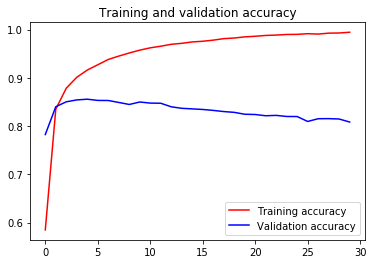

<Figure size 432x288 with 0 Axes>

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

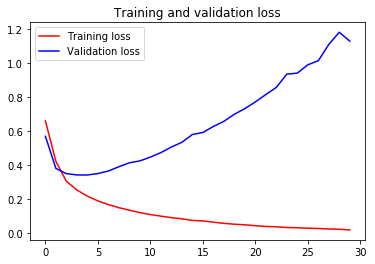

<Figure size 432x288 with 0 Axes>

In [21]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [26]:
#Sanity check
sentence=["Mom scolded and tpold me that I can't get a girlfriend",
         "Ranchi has been declared a red-zone area due to rising number of COVID-19 patients"]
sequences=tokenizer.texts_to_sequences(sentence)
padded=pad_sequences(sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)
print(model.predict(padded))

[[1.5018439e-09]
 [9.9996293e-01]]


In [27]:
#Our model correctly predited the first sentence as a sarcasm and the second one as not a sarcasm